In [4]:
from models.bmmae import ViTEncoder
import torch


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pretrained_model = ViTEncoder.from_pretrained().to(device)
random_model = ViTEncoder.from_pretrained(random_init=True).to(device)

Using randomly initialized weights


In [5]:
from utils.datasets import create_pd_data_loaders

train_loader, val_loader, test_loader = create_pd_data_loaders(
    data_dir="data/PD", batch_size=8, num_workers=4
)

print(f"Training samples: {len(train_loader.dataset)}")
print(f"Validation samples: {len(val_loader.dataset)}")
print(f"Test samples: {len(test_loader.dataset)}")


Training samples: 416
Validation samples: 84
Test samples: 334


RUNNING COMPLETE ANALYSIS FOR BrainIAC

EXTRACTING EMBEDDINGS

Checkpoint model:


Extracting embeddings: 100%|██████████| 416/416 [00:28<00:00, 14.78it/s]


Extracted embeddings shape: (416, 166656)
Number of samples: 416


Extracting embeddings: 100%|██████████| 84/84 [00:05<00:00, 14.90it/s]


Extracted embeddings shape: (84, 166656)
Number of samples: 84


Extracting embeddings: 100%|██████████| 334/334 [00:22<00:00, 14.87it/s]


Extracted embeddings shape: (334, 166656)
Number of samples: 334

Random model:


Extracting embeddings: 100%|██████████| 416/416 [00:28<00:00, 14.76it/s]


Extracted embeddings shape: (416, 166656)
Number of samples: 416


Extracting embeddings: 100%|██████████| 84/84 [00:05<00:00, 14.98it/s]


Extracted embeddings shape: (84, 166656)
Number of samples: 84


Extracting embeddings: 100%|██████████| 334/334 [00:22<00:00, 14.79it/s]


Extracted embeddings shape: (334, 166656)
Number of samples: 334

RUNNING CLASSIFICATION EVALUATIONS

Checkpoint model:

K-NN EVALUATION: BRAINIAC

=== DISEASE STATUS CLASSIFICATION ===
K-NN (k=5) Accuracy: 0.6317
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       164
           1       0.65      0.59      0.62       170

    accuracy                           0.63       334
   macro avg       0.63      0.63      0.63       334
weighted avg       0.63      0.63      0.63       334


=== SEX CLASSIFICATION ===
K-NN (k=5) Accuracy: 0.6078
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.70      0.60       141
           1       0.71      0.54      0.61       193

    accuracy                           0.61       334
   macro avg       0.62      0.62      0.61       334
weighted avg       0.63      0.61      0.61       334


=== STUDY CLASSIFICATION ===


/data/Software/.conda/envs/fomo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/data/Software/.conda/envs/fomo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/data/Software/.conda/envs/fomo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Logistic Regression Accuracy: 0.7006
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       164
           1       0.71      0.71      0.71       170

    accuracy                           0.70       334
   macro avg       0.70      0.70      0.70       334
weighted avg       0.70      0.70      0.70       334


=== SEX LOGISTIC REGRESSION CLASSIFICATION ===
Logistic Regression Accuracy: 0.8084
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       141
           1       0.84      0.83      0.83       193

    accuracy                           0.81       334
   macro avg       0.80      0.80      0.80       334
weighted avg       0.81      0.81      0.81       334


=== STUDY LOGISTIC REGRESSION CLASSIFICATION ===
Logistic Regression Accuracy: 0.7545
Classification Report:
              precision    recall  f1-score   support

           0 

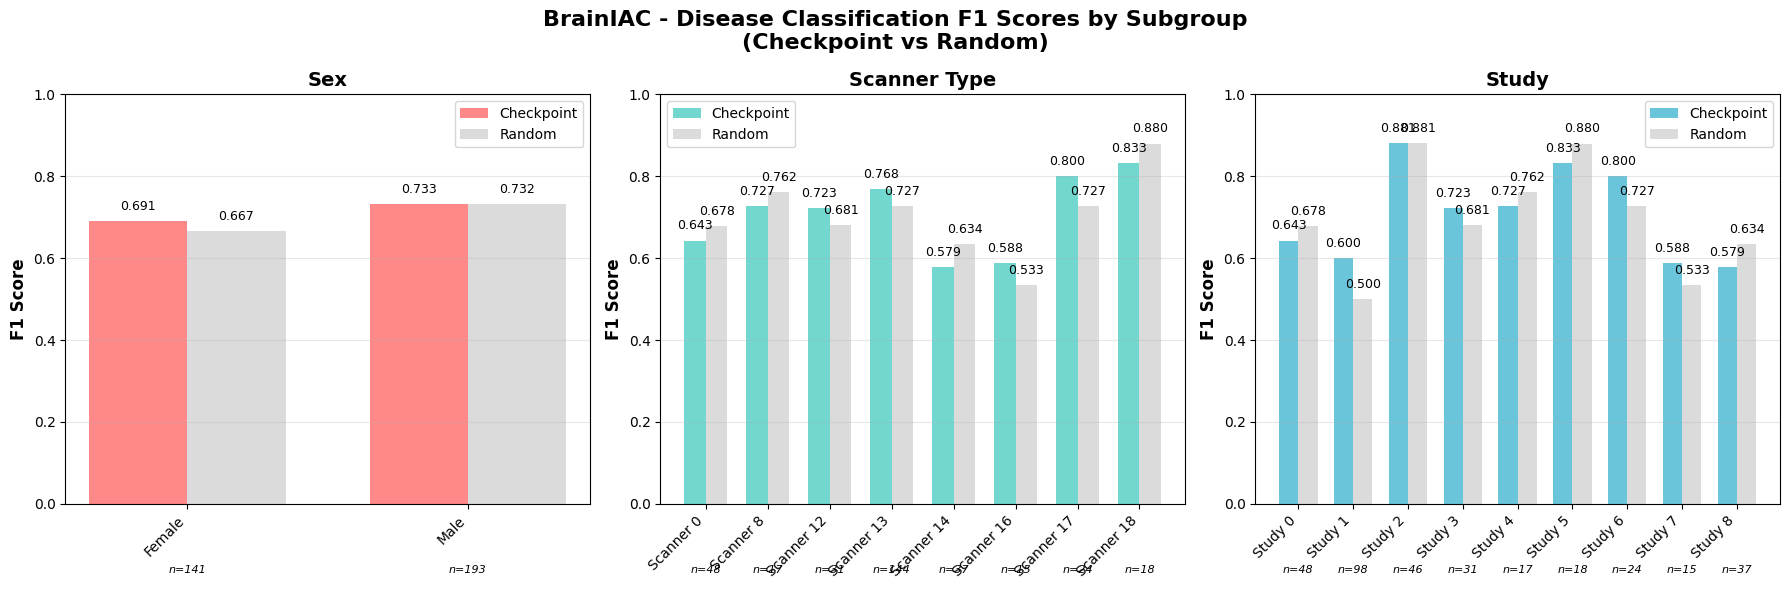


SUBGROUP F1 SCORE ANALYSIS: BrainIAC

Sex Subgroups:
------------------------------------------------------------
      Female (n=141): Checkpoint=0.6912, Random=0.6667, Δ=+0.0245
        Male (n=193): Checkpoint=0.7327, Random=0.7317, Δ=+0.0010

Scanner Type Subgroups:
------------------------------------------------------------
   Scanner 0 (n= 48): Checkpoint=0.6429, Random=0.6780, Δ=-0.0351
   Scanner 8 (n= 17): Checkpoint=0.7273, Random=0.7619, Δ=-0.0346
  Scanner 12 (n= 31): Checkpoint=0.7234, Random=0.6809, Δ=+0.0426
  Scanner 13 (n=144): Checkpoint=0.7677, Random=0.7273, Δ=+0.0404
  Scanner 14 (n= 37): Checkpoint=0.5789, Random=0.6341, Δ=-0.0552
  Scanner 16 (n= 15): Checkpoint=0.5882, Random=0.5333, Δ=+0.0549
  Scanner 17 (n= 24): Checkpoint=0.8000, Random=0.7273, Δ=+0.0727
  Scanner 18 (n= 18): Checkpoint=0.8333, Random=0.8800, Δ=-0.0467

Study Subgroups:
------------------------------------------------------------
     Study 0 (n= 48): Checkpoint=0.6429, Random=0.6780, Δ=-0

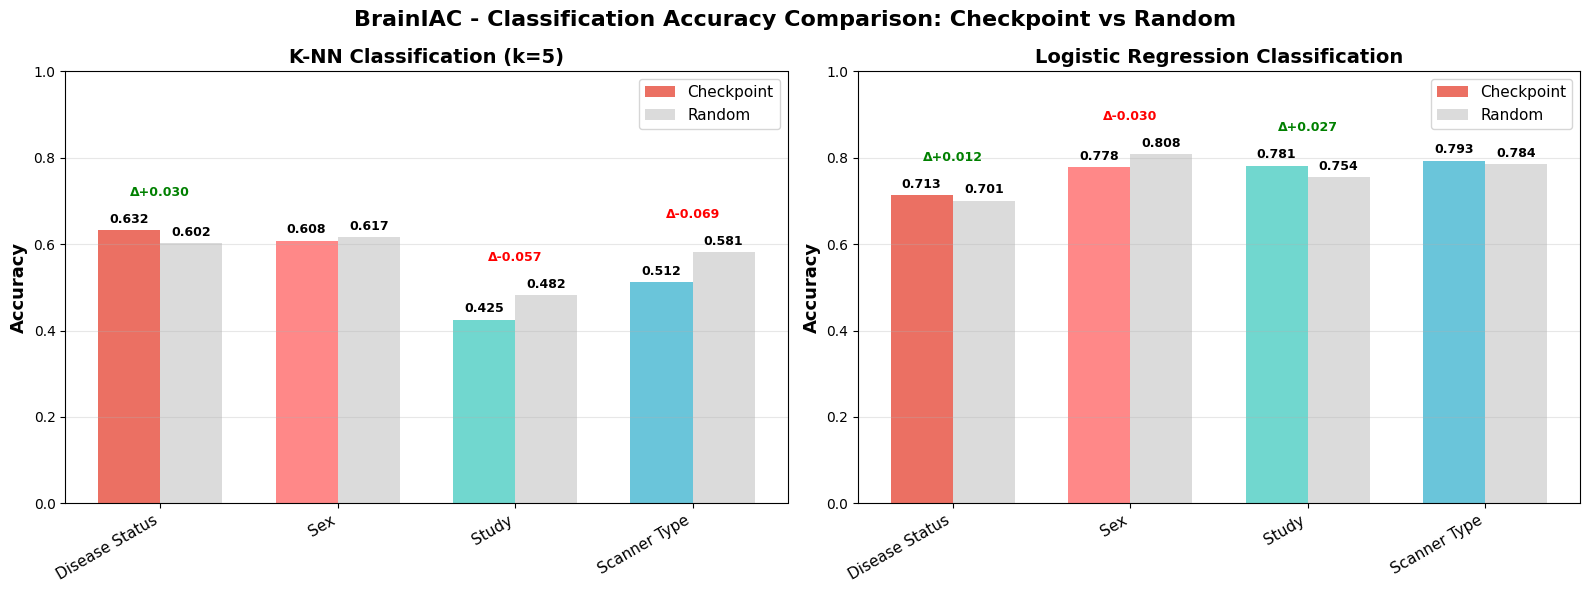


OVERALL CLASSIFICATION ACCURACY COMPARISON

Task                  KNN Checkpoint      KNN Random   LR Checkpoint       LR Random
------------------------------------------------------------------------------------------
Disease Status                0.6317          0.6018          0.7126          0.7006
Sex                           0.6078          0.6168          0.7784          0.8084
Study                         0.4251          0.4820          0.7814          0.7545
Scanner Type                  0.5120          0.5808          0.7934          0.7844

Task                           KNN Δ            LR Δ
------------------------------------------------------------------------------------------
Disease Status                0.0299          0.0120
Sex                          -0.0090         -0.0299
Study                        -0.0569          0.0269
Scanner Type                 -0.0689          0.0090

AVERAGE ACCURACIES
K-NN Checkpoint:         0.5442
K-NN Random:             0.570

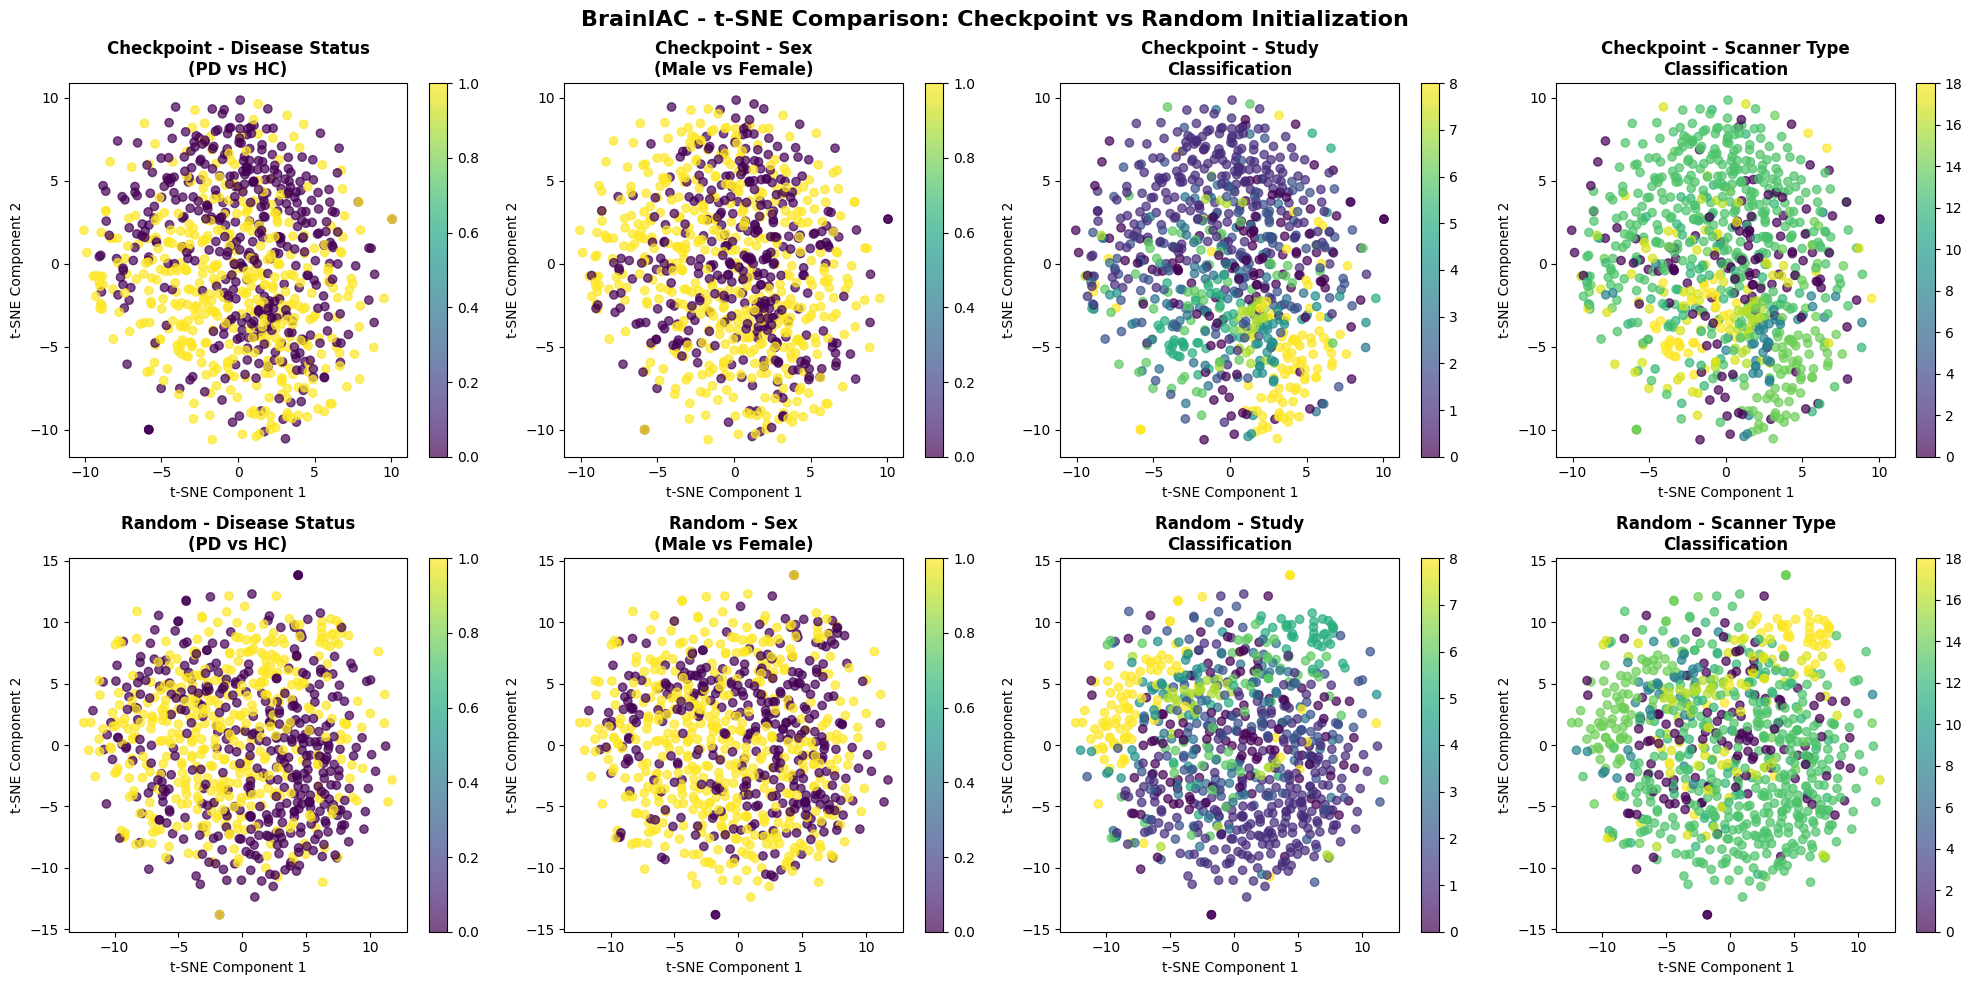


✓ ANALYSIS COMPLETE!

Generated outputs:
  • Subgroup F1 score plots (sex, scanner, study)
  • Overall accuracy comparison (K-NN and Logistic Regression)
  • t-SNE comparison visualizations


In [6]:
from analysis_template import run_complete_analysis
results = run_complete_analysis(pretrained_model, random_model, train_loader, val_loader, test_loader, device, "BrainIAC")

In [4]:
embeddings = {"train": train_emb, "val": val_emb, "test": test_emb}
metadata = {"train": train_meta, "val": val_meta, "test": test_meta}


K-NN EVALUATION: UNET_B

=== DISEASE STATUS CLASSIFICATION ===
K-NN (k=5) Accuracy: 0.5778
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.67      0.61       164
           1       0.61      0.49      0.54       170

    accuracy                           0.58       334
   macro avg       0.58      0.58      0.58       334
weighted avg       0.58      0.58      0.57       334



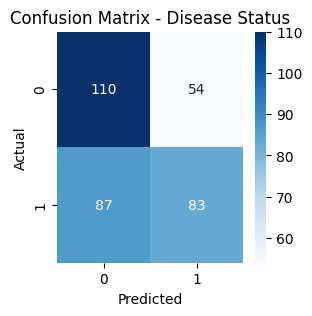


=== SEX CLASSIFICATION ===
K-NN (k=5) Accuracy: 0.6257
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.68      0.61       141
           1       0.72      0.59      0.64       193

    accuracy                           0.63       334
   macro avg       0.63      0.63      0.62       334
weighted avg       0.64      0.63      0.63       334



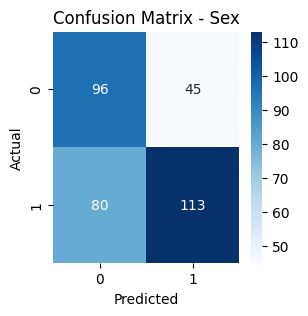


=== STUDY CLASSIFICATION ===
K-NN (k=5) Accuracy: 0.4671
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.46      0.45        48
           1       0.73      0.71      0.72        98
           2       0.25      0.48      0.33        46
           3       0.38      0.19      0.26        31
           4       0.17      0.06      0.09        17
           5       1.00      0.33      0.50        18
           6       0.00      0.00      0.00        24
           7       0.25      0.87      0.39        15
           8       0.70      0.43      0.53        37

    accuracy                           0.47       334
   macro avg       0.44      0.39      0.36       334
weighted avg       0.50      0.47      0.45       334



/data/Software/.conda/envs/fomo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/data/Software/.conda/envs/fomo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/data/Software/.conda/envs/fomo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

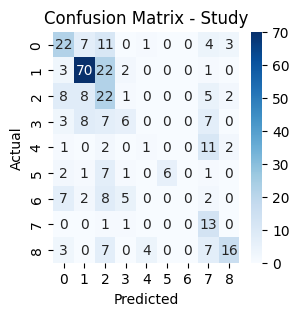


=== SCANNER TYPE CLASSIFICATION ===
K-NN (k=5) Accuracy: 0.5449
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.33      0.38        48
           8       0.12      0.06      0.08        17
          12       0.32      0.26      0.29        31
          13       0.64      0.85      0.73       144
          14       0.78      0.49      0.60        37
          16       0.28      0.87      0.43        15
          17       0.00      0.00      0.00        24
          18       1.00      0.22      0.36        18

    accuracy                           0.54       334
   macro avg       0.45      0.38      0.36       334
weighted avg       0.53      0.54      0.50       334



/data/Software/.conda/envs/fomo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/data/Software/.conda/envs/fomo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/data/Software/.conda/envs/fomo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

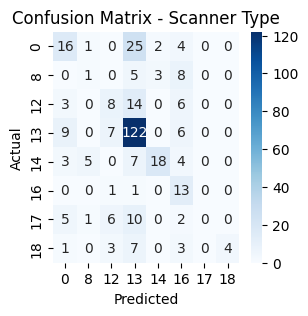


K-NN RESULTS SUMMARY
          Task  K-NN Accuracy
Disease Status       0.577844
           Sex       0.625749
         Study       0.467066
  Scanner Type       0.544910


In [5]:
knn_results = knn_evaluation(embeddings, metadata, "UNet_B", k=5)


T-SNE VISUALIZATION: UNET_B
Computing t-SNE for 834 samples...


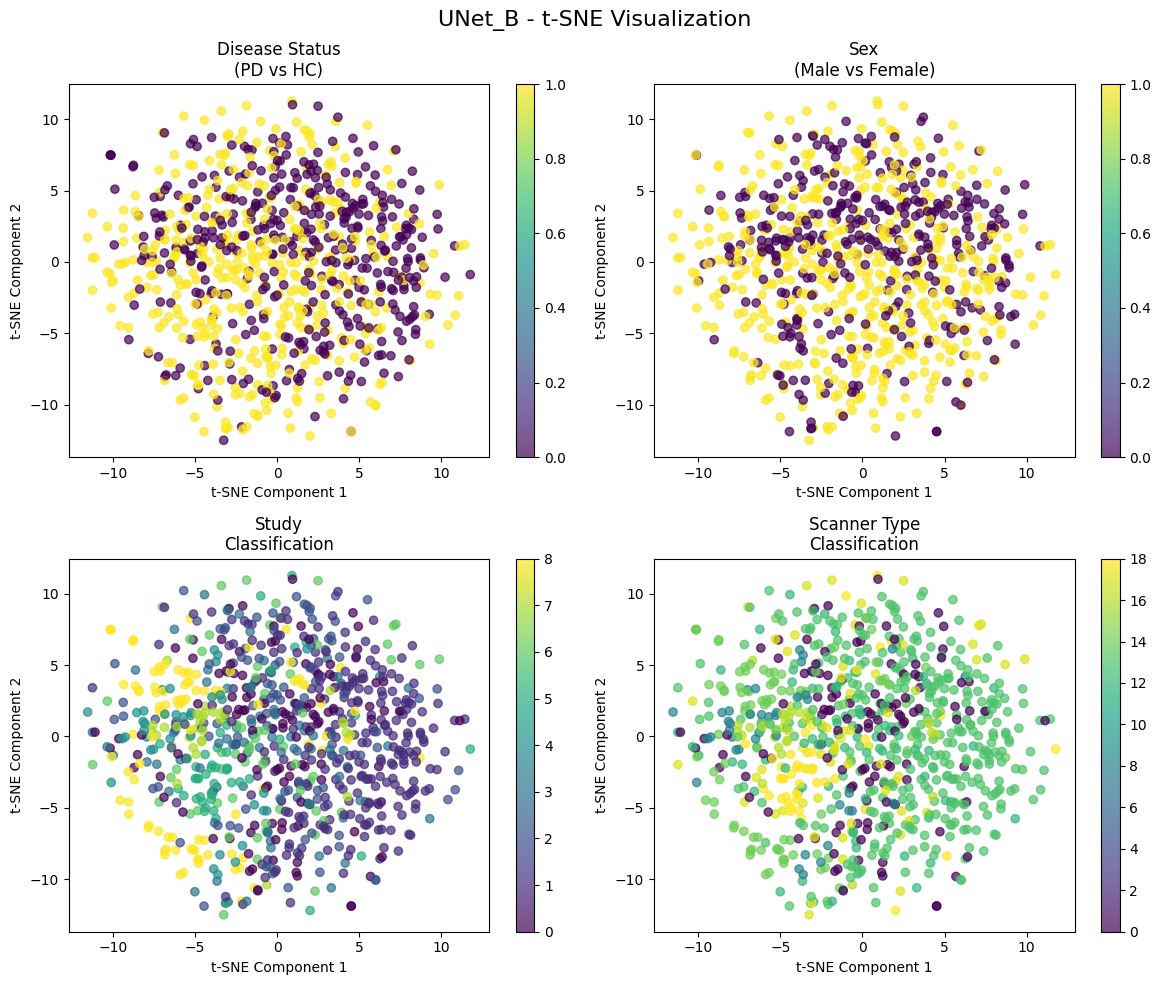

In [6]:
tsne_results = tsne_visualization(embeddings, metadata, "UNet_B", perplexity=30)